In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
comments=pd.read_csv('../input/data-for-youtube/1-Youtube Text Data Analysis/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head(10)

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0


****Perform Sentiment Analysis Comments****


In [4]:
#!pip install textblob

In [5]:
from textblob import TextBlob

In [6]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [7]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
polarity=[]

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
comments['polarity']=polarity

In [11]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


**EDA Positive and Negative Analysis**

In [12]:
comments_positive=comments[comments['polarity']==1]

In [13]:
comments_positive.shape

(20400, 5)

In [14]:
comments_positive.head(10)

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0
202,T_PuZBdT2iM,Power is the disease. Care is the cure. Keep...,0,0,1.0
206,T_PuZBdT2iM,WHY DO I KEEP FREAKING LAUGHING EACH TIME I WA...,0,0,1.0
237,T_PuZBdT2iM,LIKE = MEET CELEBRITY \nSUBSCRIBE = BECOME A B...,0,0,1.0
243,T_PuZBdT2iM,the sonic air timer was perfect,0,0,1.0
283,T_PuZBdT2iM,no 16 on trending impressive,1,0,1.0


In [15]:
#!pip install wordcloud

In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
stopwords=set(STOPWORDS)

In [18]:
total_comments=''.join(comments_positive['comment_text'])

In [19]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

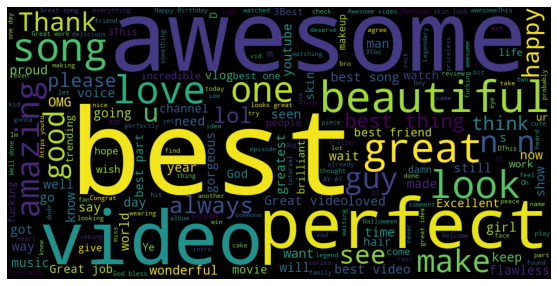

In [20]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [21]:
comments_negative=comments[comments['polarity']==-1]

In [22]:
total_comments=''.join(comments_negative['comment_text'])

In [23]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

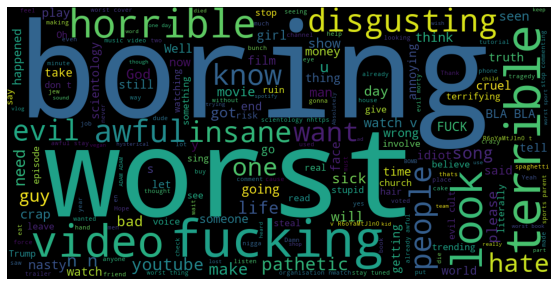

In [24]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

**Videos Tranding Tags Analysis**

In [25]:
videos=pd.read_csv('../input/data-for-youtube/1-Youtube Text Data Analysis/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [26]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [27]:
tags_complete=''.join(videos['tags'])

In [28]:
#tags_complete

In [29]:
import re

In [30]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [31]:
#tags

In [32]:
tags=re.sub(' +',' ',tags)

In [33]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

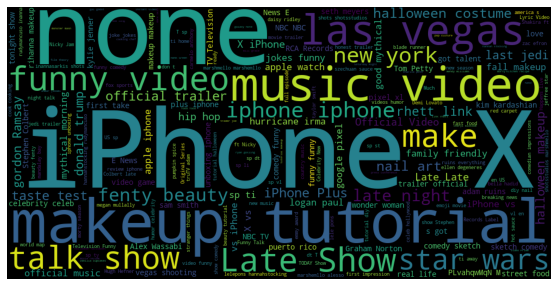

In [34]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for views & likes')

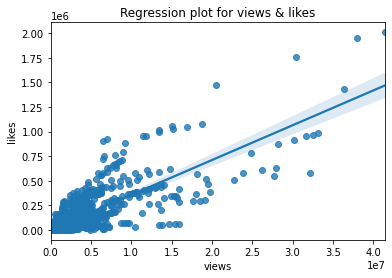

In [35]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

Text(0.5, 1.0, 'Regression plot for views & dislikes')

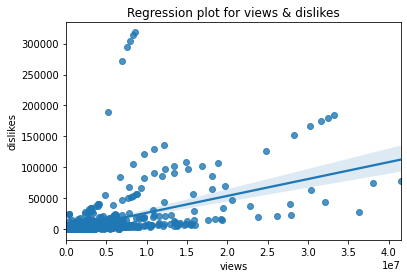

In [36]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

In [37]:
ga_corr=videos[['views','likes','dislikes']]

In [38]:
ga_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


<AxesSubplot:>

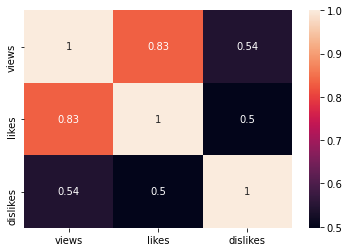

In [39]:
sns.heatmap(ga_corr.corr(),annot=True)

In [40]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [41]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [42]:
print('\U0001F600')

😀


In [43]:
!pip install emoji

In [44]:
import emoji

In [45]:
len(comments)

718424

In [46]:
comment=comments['comment_text'][1]

In [47]:
[p for p in comment if p in emoji.UNICODE_EMOJI_ALIAS_ENGLISH]

['😂', '😂', '😂']

In [48]:
str=''
for i in comments['comment_text']:
    list=[p for p in i if p in emoji.UNICODE_EMOJI_ALIAS_ENGLISH]
    for ele in list:
        str=str+ele

In [49]:
len(str)

341870

In [50]:
#str

In [51]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [52]:
#result

In [53]:
result.items()

dict_items([('🆓', 8), ('🎢', 22), ('🥅', 2), ('🚕', 17), ('🎿', 10), ('🌊', 158), ('📅', 12), ('🗞', 5), ('🎖', 38), ('⤵', 6), ('🤱', 2), ('😒', 570), ('🍋', 53), ('🛅', 6), ('🚩', 12), ('📩', 9), ('🈸', 16), ('🍮', 18), ('👸', 125), ('📦', 17), ('🌾', 33), ('🌵', 42), ('⏸', 4), ('👴', 40), ('😧', 266), ('🇾', 33), ('🔧', 19), ('🏫', 25), ('🌫', 5), ('💔', 652), ('🦁', 39), ('⛪', 29), ('🦏', 1), ('💃', 226), ('🏣', 8), ('⏩', 11), ('😜', 684), ('🤡', 277), ('🦀', 21), ('🍡', 30), ('🚃', 6), ('❌', 62), ('🙃', 278), ('☢', 20), ('📞', 66), ('🕺', 41), ('🚏', 6), ('⚖', 12), ('🧖', 5), ('♂', 447), ('🥌', 1), ('🌜', 35), ('🧤', 1), ('🕉', 10), ('🤟', 1), ('🎎', 8), ('🕤', 7), ('🍗', 630), ('📓', 21), ('🆎', 5), ('⬛', 153), ('🚂', 11), ('🔐', 29), ('🍀', 68), ('📲', 17), ('🚨', 196), ('😳', 545), ('🚭', 9), ('🏃', 47), ('😬', 5489), ('🐝', 143), ('⚕', 16), ('🐴', 28), ('💹', 4), ('☝', 187), ('🤪', 10), ('⚱', 23), ('🍛', 23), ('👭', 75), ('👕', 35), ('🚶', 16), ('🃏', 10), ('🐅', 20), ('🗣', 65), ('🦃', 16), ('🍒', 43), ('😼', 31), ('🔪', 92), ('✋', 149), ('☃', 12), (

In [54]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

In [55]:
#final

In [56]:
keys=[*final.keys()]

In [57]:
#keys

In [58]:
values=[*final.values()]

In [59]:
#values

In [60]:
df=pd.DataFrame({'chars':keys[-20:],'mum':values[-20:]})

In [61]:
df.head(10)

,chars,mum
0,🙌,2734
1,🏼,2961
2,💙,2968
3,💗,3071
4,👌,3534
5,💜,3616
6,🏻,4412
7,💖,4809
8,😊,4946
9,👏,5357


**Moji Trande Visualization**

In [62]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [63]:
trace=go.Bar(
x=df['chars'],
y=df['mum']
)
iplot([trace])
